In [1]:
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fl='E:/python/testData/건별업적.xlsx'
df= pd.read_excel(fl,header=0)

In [5]:
df.columns

Index(['지점', '직할지점', '팀', '수금사원명', '보험사', '계약종류', '상품종류', '초회보험료', '계약상태',
       '계약일자', '최종상태변경일', '증권번호', '월구분', '상태기준일', '상태', '그룹화지점', '파일타입'],
      dtype='object')

# 1. barplot

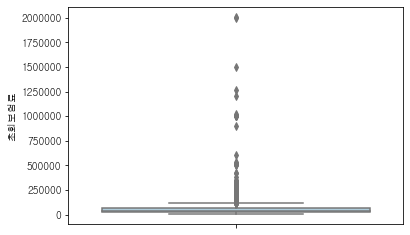

In [6]:
sns.boxplot(y="초회보험료", data=df, palette="Paired")

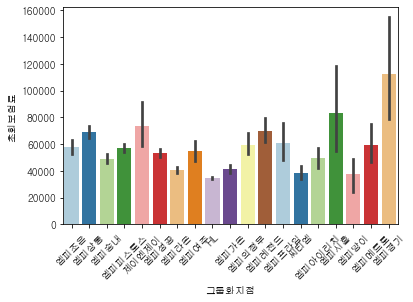

In [9]:
plt.xticks(rotation=45)
sns.barplot(x='그룹화지점', y="초회보험료", data=df, palette="Paired")

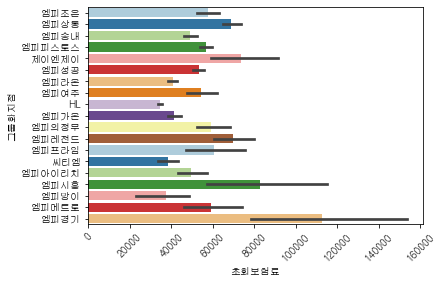

In [58]:
plt.xticks(rotation=45)
sns.barplot(x='초회보험료', y="그룹화지점", data=df, palette="Paired")

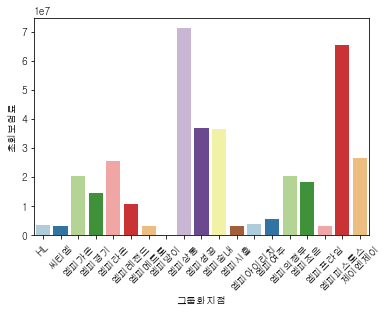

In [23]:
dfT=df.groupby('그룹화지점')['초회보험료'].sum()
plt.xticks(rotation=45)
sns.barplot(x='그룹화지점', y="초회보험료", data=pd.DataFrame(dfT).reset_index(), palette="Paired")

In [10]:
sns.countplot?

Signature:
sns.countplot(
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None,
    **kwargs,
)
Docstring:
Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead
of quantitative, variable. The basic API and options are identical to those
for :func:`barplot`, so you can compare counts across nested variables.


Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series
  objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
- A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
  variables will determine how the data are plotted.
- A "wide-form" DataFrame, such that each numeric column will be plotted.
- An array or list of vectors.

In most cases, it is poss

# 2. 히스토그램

d:\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
d:\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


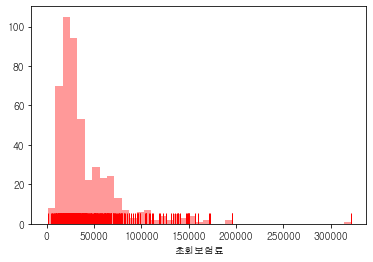

In [27]:
sns.distplot(df["초회보험료"][df["그룹화지점"]=="엠피리스토스"], kde=False, rug=True)
sns.distplot(df["초회보험료"][df["그룹화지점"]=="엠피가온"], kde=False, rug=True, color="r")

# 3. counterplot
  - 범주형 변수 분포를 알기 위한 counterplot  
  - catplot를 이용하면 3개까지 비교 가능

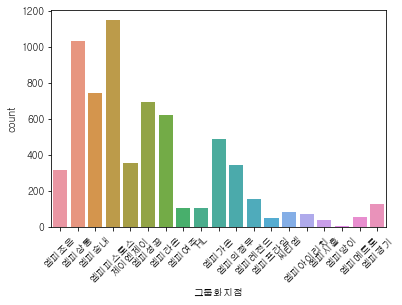

In [30]:
plt.xticks(rotation=45)
sns.countplot(x="그룹화지점", data=df)

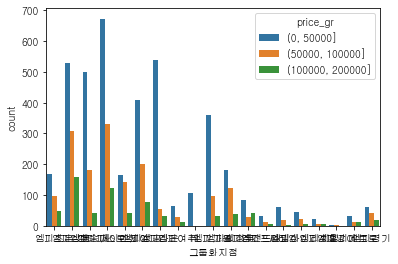

In [35]:
df["price_gr"] = pd.cut(df["초회보험료"], [0, 50000, 100000,200000])
sns.countplot(x="그룹화지점", hue="price_gr", data=df)

#  catplot

변수별로 비교하기 위해서 catplot을 사용하면 유용하다. catplot은 categorical plot의 약자로 범주형 변수에 따라 그래프를 나눠서 그리기 위해서 사용한다.  
비교할 수 있는 그래프의 종류는 “point”, “bar”, “strip”, “swarm”, “box”, “violin”, or “boxen”의 7개이다.  

catplot을 이용하면 col이라는 입력변수를 이용해서 R의 facetgrids와 같이 여러 개의 그래프를 그릴 수 있다. 다만 한 가지 헷갈리는 게 있다.  
라인그래프는 relplot의 col이라는 입력변수를 넣고, kind="line"으로 그려야 한다. col에 변수를 넣으면 행으로, row에 변수를 넣으면 열로 그릴 수 있다.  

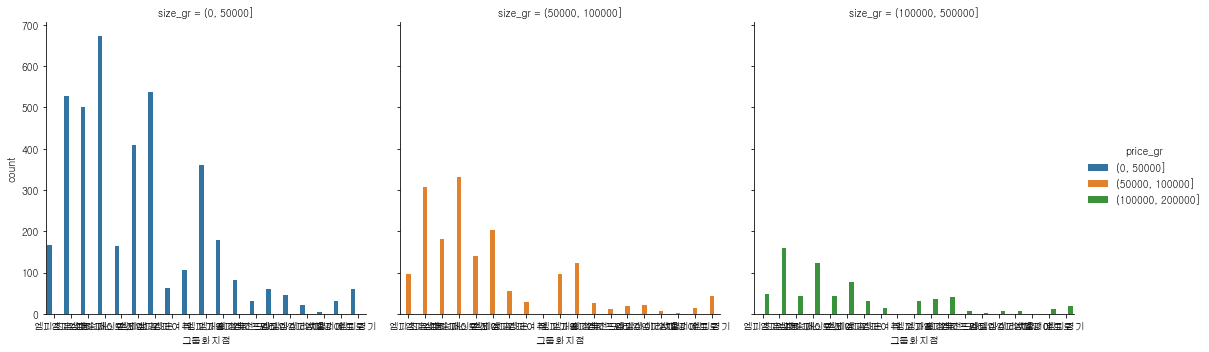

In [60]:
df["size_gr"] = pd.cut(df["초회보험료"], [0, 50000, 100000,500000])
sns.catplot(x="그룹화지점", hue="price_gr", col="size_gr", kind="count", data=df)

# 4. 산점도
 - 2개 이상의 연속형 변수 비교  

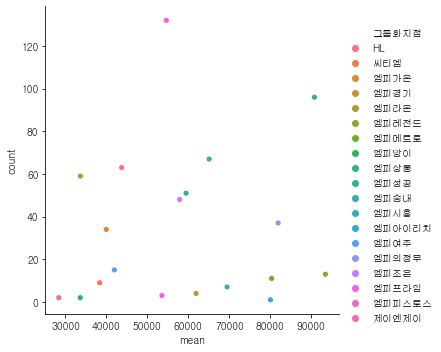

In [50]:
fr=pd.to_datetime('2020-02-01',format='%Y-%m-%d')
to=pd.to_datetime('2020-02-28',format='%Y-%m-%d')
cond= (df.계약일자 >= fr) & (df.계약일자 <= to)
sns.relplot(x="mean", y="count", hue="그룹화지점", data=df[cond].groupby('그룹화지점')['초회보험료'].agg(['mean','count']).reset_index())

# 5. 라인그래프  
 - 시계열변수 

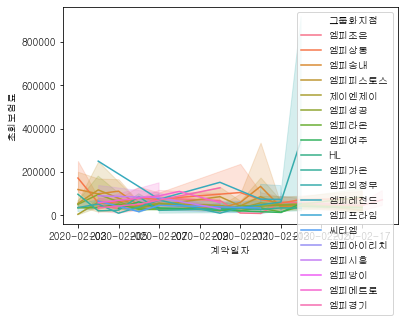

In [52]:
fr=pd.to_datetime('2020-02-01',format='%Y-%m-%d')
to=pd.to_datetime('2020-02-28',format='%Y-%m-%d')
cond= (df.계약일자 >= fr) & (df.계약일자 <= to)
dfT=df[cond]
sns.lineplot(x="계약일자", y="초회보험료", hue="그룹화지점", data=dfT)

## 라인그래프2   변수별로 비교하기 위해서 relplot을 사용하면 유용하다.  
kind라는 입력인자에 line이라는 값을 넣으면 라인그래프를 그릴 수 있다.

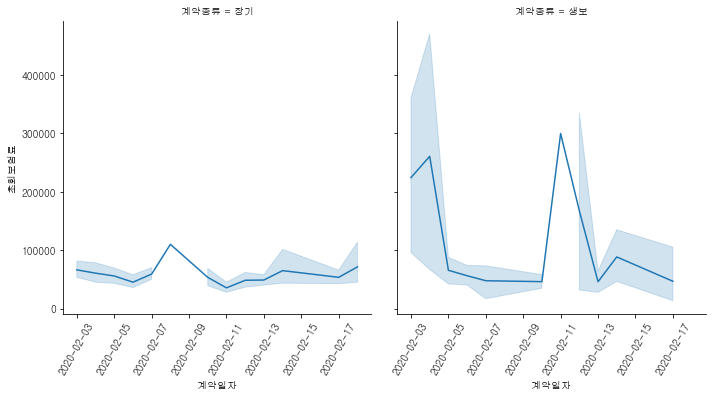

In [57]:
g = sns.relplot(x="계약일자", y="초회보험료", col="계약종류", kind="line", data=dfT)
(g.set_xticklabels(rotation=60))

## R의 페어플랏과 동일한 레이아웃의 그래프를 그려준다. 비교하려는 변수의 갯수가 2개 이상일 때 사용하면 유용하다.

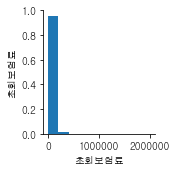

In [63]:
sns.pairplot(df[["초회보험료","계약종류","그룹화지점"]])

# 히트맵

In [98]:
fr=pd.to_datetime('2020-02-01',format='%Y-%m-%d')
to=pd.to_datetime('2020-02-28',format='%Y-%m-%d')
cond= (df.계약일자 >= fr) & (df.계약일자 <= to)
dfT=df[cond]
dfTT= pd.DataFrame(dfT.groupby(['계약일자','그룹화지점'])['초회보험료'].agg(['count','sum'])).reset_index()

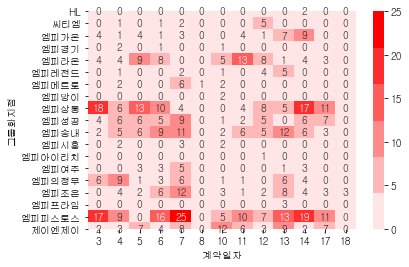

In [158]:
fp = dfTT.pivot('그룹화지점','계약일자','count').fillna(0)
             # 열인덱스, 행인덱스, 데이터    순서로 들어감
#sns.heatmap(fp, linewidths=1,annot=True,fmt='d')
sns.heatmap(fp, annot=True, fmt='.2g', cmap=sns.light_palette('red'))
# annot=True : 숫자가 출력될 수 있게
# fmt='d' : 지수형태의 숫자가 아닌 지수형태의 숫자로 변경
# cmap=sns.light_palette('red') : 색상 결정

# 판다스에서 바로 그리기

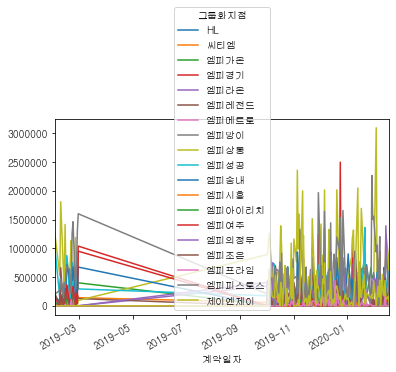

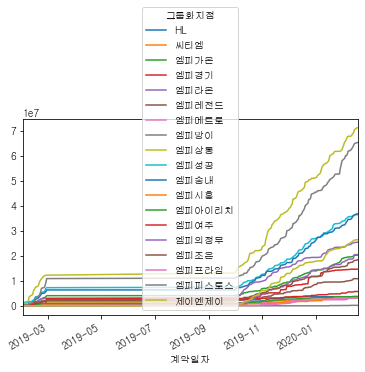

In [155]:
# 판다스 데이터프레임에서 각 열에 대해서 그래프를 그릴 수 있음
df1=pd.pivot_table(df,index='계약일자',values='초회보험료',columns='그룹화지점',aggfunc=np.sum, fill_value=0)
df1.plot() # 일변 변화량 또는 변동폭을 그래프로 나타냄
df1.cumsum().plot()
# cumsum() : 누적합 : 누적합으로 그래프를 그리면 해당 열의 값이 어떻게 변해가는지 확인할 수 있음
# 금융, 주식 등에서 수익률을 계산할 때 활용할 수있음

In [157]:
df.plot?

Signature:   df.plot(*args, **kwargs)
Type:        PlotAccessor
String form: <pandas.plotting._core.PlotAccessor object at 0x00000162578B9608>
File:        d:\anaconda3\lib\site-packages\pandas\plotting\_core.py
Docstring:  
Make plots of Series or DataFrame using the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'he